This Jupyter Notebook is meant to create the data visualization for our 3D Conceptual Risk-Scoring  Matrix Model, using Matplotlib with Python. 

Source/Credits: https://likegeeks.com/3d-plotting-in-python/

## Importing Libraries

In [38]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Creating Figure and Axis, and plotting the point(s)

<IPython.core.display.Javascript object>


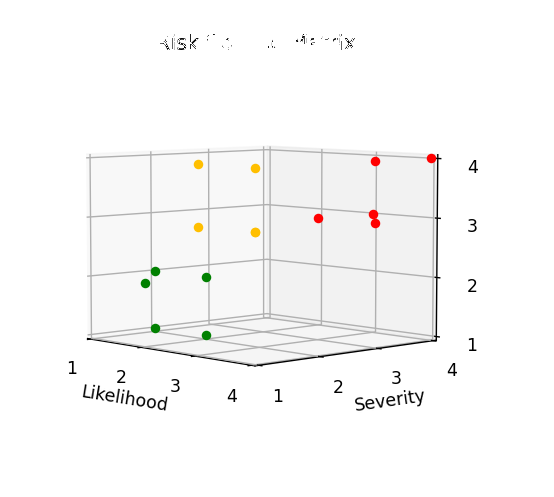

In [40]:
# Creating the empty figure
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')

# Naming the figure & the axes 
ax.set_title("Risk Scoring Matrix")
ax.set_xlabel("Likelihood")
ax.set_ylabel("Severity")
ax.set_zlabel("Degree of Human Control")

# Setting the limits of each axes
ax.set_xlim(1,4)
ax.set_ylim(1,4)
ax.set_zlim(1,4)

# Setting the gridlines
ax.set_xticks([1,2,3,4])
ax.set_yticks([1,2,3,4])
ax.set_zticks([1,2,3,4])

# Plotting the points on the figure
# GREEN - Not likely, non severe, low deg 
ax.scatter(1,2,1, c='g')
ax.scatter(2,2,2, c='g') 
ax.scatter(2,1,2, c='g') 
ax.scatter(1,2,2, c='g') 
ax.scatter(2,2,1, c='g')
# AMBER - Likely, non severe, high deg
ax.scatter(4,1,4, c='#FFBF00') 
ax.scatter(3,1,4, c='#FFBF00') 
ax.scatter(4,1,3, c='#FFBF00') 
ax.scatter(4,1,3, c='#FFBF00') 
ax.scatter(3,1,3, c='#FFBF00') 
# RED - Likely, severe, high deg
ax.scatter(4,3,3, c='r') 
ax.scatter(3,4,3, c='r') 
ax.scatter(3,3,3, c='r') 
ax.scatter(4,3,4, c='r') 
ax.scatter(4,4,4, c='r')

plt.show()

Comments: 
1. [TO-DO] Colors for each points should be determined by certain logic (e.g. if vector values between (0,0,0) and (1,1,1) would be green etc)
2. [Good To Have] There should be some sort of annotations/labels when we over a data point 
3. Float values supported by points - i.e. points can very well be (1.2, 3.1, 3.7) instead of (1,3,4)
